In [20]:
import numpy as np
import torch
from math import e

In [32]:
def sigmoid(x):
    return (1/(1+e**-x))
sigmoid(3)

0.9525741268224331

In [35]:
# numerically calculating gradient
h=0.01
x=3
dsdx=(sigmoid(x+h)-sigmoid(x))/h
print(dsdx)
dsdx=(sigmoid(x+h)-sigmoid(x-h))/(h*2)
print(dsdx)

0.04497274992831812
0.04517720858176477


In [38]:
x=torch.tensor(3.0,requires_grad=True)
y=torch.sigmoid(x)
y.backward()
print(x.grad)

tensor(0.0452)


In [46]:
#analytically calculating gradient 
def dsigmoidDx(x):
    return (sigmoid(x))*(1-sigmoid(x))
dsigmoidDx(3)

In [70]:
#softmax
x=np.array([1,2,3])
def softmax(x):
    #what is the nice way of writing sigmoid function without spaggeti code
    acc=sum(map(lambda x:e**x,x))
    
    return e**x/acc
softmax(x)

array([0.09003057, 0.24472847, 0.66524096])

In [81]:
#numerical gradient of softmax
x=np.array([1,2,3])
h=0.01
for i in range(3):

    zeros=np.zeros(3)
    zeros[i]=h
    print((softmax(x+zeros)-softmax(x))/h)
    

[ 0.08226163 -0.02212356 -0.06013807]
[-0.02208925  0.18530794 -0.16321869]
[-0.05979272 -0.16253348  0.2223262 ]


In [77]:
x=torch.tensor([1,2,3],dtype=float,requires_grad=True)
torch.nn.functional.softmax(x,dim=0)
# is there any way to do this in pytroch


tensor([0.0900, 0.2447, 0.6652], dtype=torch.float64,
       grad_fn=<SoftmaxBackward0>)

In [83]:
#calculating gradients analytically 
for i in range(3):
    a=[]
    for j in range(3):
        if (i==j):
            a.append((softmax(x)[i]*(1-softmax(x)[i])).item())
        else:
            a.append((-softmax(x)[i]*softmax(x)[j]).item())
    print(a)

[0.08192506906499324, -0.022033044520174298, -0.05989202454481893]
[-0.022033044520174298, 0.1848364465099787, -0.1628034019898044]
[-0.05989202454481893, -0.1628034019898044, 0.2226954265346234]


In [101]:
#softmax + cross entropy
x=np.array([1,2,3])
y=np.array([0,1,0])
def forward(x,y):
    o=softmax(x)
    # cross entropy
    loss=-(np.log(o)*y).sum()
    return loss
for i in range(3):

    zeros=np.zeros(3)
    zeros[i]=h
    print((forward(x+zeros,y)-forward(x,y))/h)
# print(forward(x,y))
    

0.09044131981050807
-0.7543457747791082
0.6663532031848884


In [100]:
x=torch.tensor([1,2,3],dtype=float,requires_grad=True)
y=torch.tensor([0,1,0],dtype=float,requires_grad=True)

loss=torch.nn.functional.cross_entropy(x,y)
loss.backward()
x.grad

tensor([ 0.0900, -0.7553,  0.6652], dtype=torch.float64)

In [103]:
#calculating analytically
x=np.array([1,2,3])
y=np.array([0,1,0])
o=softmax(x)

dldx=[]
for i in range(3):
    dldx.append(o[i]-y[i])
print(dldx)

[0.09003057317038046, -0.7552715289452023, 0.6652409557748218]


In [111]:
import matplotlib.pyplot as plt

In [121]:
x.shape

(1000,)

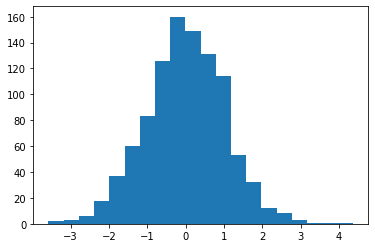

In [135]:
plt.hist(diff,20)
pass